<h1>Inhaltsverzeichnis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [8]:
import pygimli as pg
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
import os
from os import system
import numpy as np

In [9]:
def callTriangle(filename,
                 quality=33, 
                 triangle='triangle',
                 verbose=True):
    
    filebody = filename.replace('.poly', '')

    syscal = triangle + ' -pq' + str(quality)
    syscal += 'Aa ' + filebody + '.poly'
 
    if verbose:
        print(syscal)

    system(syscal)

In [10]:
world = mt.createWorld(start=[-2e5, -2e5], 
                       end=[2e5, 2e5], 
                       layers=[0, 5e4], 
                       area=[0, 1e7, 0],
                       marker=[1, 2, 3],
                       worldMarker=False)

In [11]:
block = mt.createRectangle(start=[-1e4, 0],
                           end=[1e4, 5e4],
                           marker=4,  
                           markerPosition=[0, 1e3], 
                           area=1e6, boundaryMarker=10)

In [12]:
block2 = mt.createRectangle(start=[1e4, 0],
                           end=[2e5, 5e4],
                           marker=5,  
                           markerPosition=[2e4, 1e3], 
                           area=1e7, boundaryMarker=10)

In [13]:
geom = world + block + block2

TypeError: unsupported operand type(s) for +: 'Mesh' and 'Mesh'

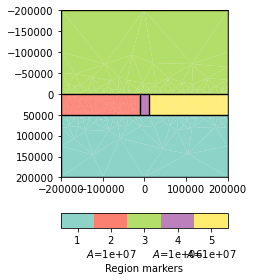

In [72]:
ax, _ = pg.show(geom, 
                showNodes=False, 
                boundaryMarker=False)
ax.set_ylim(ax.get_ylim()[::-1]);

In [73]:
mt.exportPLC(geom,
             'meshes/commemi2d0.poly', 
             float_format='.8e')

In [74]:
callTriangle('meshes/commemi2d0.poly', 
             quality=34.2,
             verbose=False)

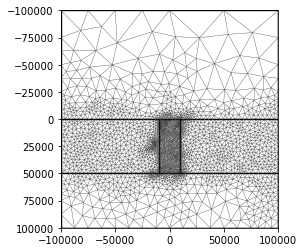

In [42]:
mesh = mt.createMesh(geom, quality=34.2)
ax, _ = pg.show(mesh)
ax.set_ylim(ax.get_ylim()[::-1]);